- Micrograd is scalar based. In production however, you need to use tensors to speed things up. Otherwise, scalar values is all you need.

In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 


In [2]:
def f(x):
    return 3*x**2-4*x+5

In [3]:
f(3.0)

20.0

Scalar- a numerical value indicating the magnitude of something, while a vector has magnitude and direction.


In [4]:
#a range from -5 to 5 in steps of .25 (not including 5)
xs=np.arange(-5,5,0.25)
xs 

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
ys=f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

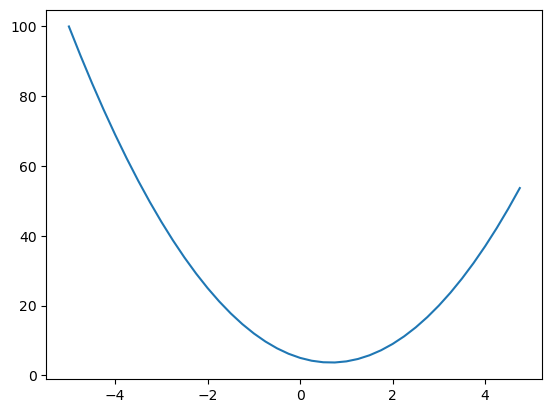

In [6]:
plt.plot(xs,ys)

In [7]:
h=0.001#small change in the x variable to see how it affects the output 
x=3.0

f(x)

20.0

derivative-rate of change of a function's output given a small change to it's independent variables.

In [8]:
derivative=(f(x+h)-f(x))/h
derivative

14.00300000000243

-To converge to thee exact derivative we have to make `h` very small 

-These are three inputs into our expression graph. The graph we are going to build here is going to represent the expression.

In [9]:
a=2.0
b=-3.0
c=10.0
d=a*b+c
print(d)

4.0


In [10]:
h=0.0001
a=2.0
b=-3.0
c=10.0

d1=a*b+c
c+=h
d2=a*b+c
print('d1:',d1)
print('d2',d2)
print('slope:',(d2-d1)/h)

d1: 4.0
d2 4.0001
slope: 0.9999999999976694


Neural networks are going to be these huge expressions and we are going to have to build a data structure that maintains them.

In [11]:
class Value:
    def __init__(self, data, _children=(),_op='',label=''):
        self.data=data
        self.grad=0.0
        self._prev=set(_children)
        self._op=_op
        self.label=label
    def __repr__(self):
        return f'Value(data={self.data})'
    def __add__(self,other):
        out=Value(self.data+other.data,(self,other),'+')
        return out
    def __mul__(self,other):
        out=Value(self.data*other.data,(self,other),'*')
        return out

In [12]:
# adding two objects
a=Value(2.0)
b=Value(-3.0)
a+b
a._prev

set()

In [13]:
#multiplying two objects
a=Value(2.0, label='a')
b=Value(-3.0,label='b')
c=Value(10.0,label='c')
e=a*b; e.label='e'
d=e+c; d.label='d'
f=Value(-2.0, label='f')
L=d*f;L.label='L'
L

Value(data=-8.0)

In [14]:
#the children of d 
d._prev
"""We get two values instead of three because internally 2 and three were multiplied resulting to 
an object  -6 which was then added to 10. Note the children come a sa result of operations. Every value that is not as a """
"""So now we know the children of every value but we don't know the operations that created the value. (I did this next)"""

"So now we know the children of every value but we don't know the operations that created the value. (I did this next)"

In [15]:
d._op
"""so now we know what operation that resulted to the value"""
"""The full expression has now been maintained"""

'The full expression has now been maintained'

In [16]:
# visualising th graph 
from graphviz import Digraph
def trace(root):
    nodes,edges=set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges
def draw_dot(root):
    dot=Digraph(format='svg',graph_attr={'rankdir': 'LR'})
    nodes,edges=trace(root)
    for n in nodes:
        uid=str(id(n))
        dot.node(name=uid, label="{%s | data %.4f | grad %.4f }" % (n.label, n.data,n.grad ), shape='record')
        if n._op:
            dot.node(name=uid + n._op,label=n._op)
            dot.edge(uid + n._op,uid)
    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
    return dot 

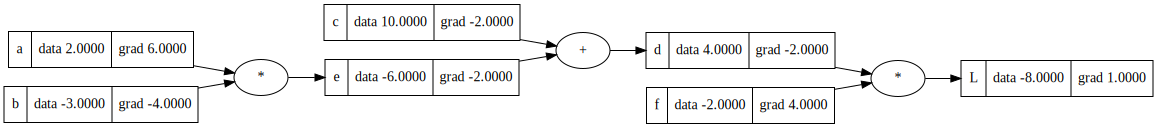

In [44]:
draw_dot(L)

- Take this as visualising the forward pass. Given the values a,b,c,e,d and f what is L(the Loss). The forward pass involves finding the Loss given some random values of its independent variables.
- The backpropagation will involve taking the derivative of L in respect to all the independent variables. As in in respect f, d,...
- We will not want the derivative of the loss function in respect to the data because the data is fixed. As in a, b and c.(In a neural network setting)
- We will create a grad variable that maintains the derivative of L in respect to that varaible or value.

In [43]:
#manual backpropagation
a.grad=6.0
b.grad=-4.0

In [39]:
def lol():
    h=0.0001
    a=Value(2.0, label='a')
    b=Value(-3.0,label='b')
    c=Value(10.0,label='c')
    e=a*b; e.label='e'
    d=e+c; d.label='d'
    f=Value(-2.0, label='f')
    L=d*f;L.label='L'
    L1=L.data

    a=Value(2.0,label='a')
    b=Value(-3.0,label='b')
    c=Value(10.0,label='c')
    e=a*b; e.label='e'
    d=e+c; d.label='d'
    d.data+=h
    f=Value(-2.0, label='f')
    L=d*f;L.label='L'
    L2=L.data 

    print((L2-L1)/h)
    

    

In [40]:
lol()

-1.9999999999953388


-We iterated through all the nodes one by one and locally applied the chain rule. We always know the derivative of L in respect to the local output. Then we look at how the output was produced. The output was produced through an operation and we have pointers to the children nodes of this operation. In this local operation we know what the local derivatives are and we just multiply them onto the derivative(in respect to L). So we just go through and recursively multiply on the local derivatives and that's what backprop is!!!!!!! A recursive application of the chain rule backwards through the computational graph.

### Applying chain rule to maximize L
- We are going to go in the direction of the gradient to maximize

In [45]:
a.data+=0.01* a.grad
b.data+=0.01* b.grad
c.data+=0.01* c.grad
f.data+=0.01* f.grad

e=a*b; 
d=e+c
L=d*f
print(L.data)

-7.286496


a,b,c and f are leaf nodes(they have no children). This means we can update them as they are not as a result of a function in this scenario.

# Backprop through a neuron
our neuron=(x1w1+x2W2->tanh activation->output)

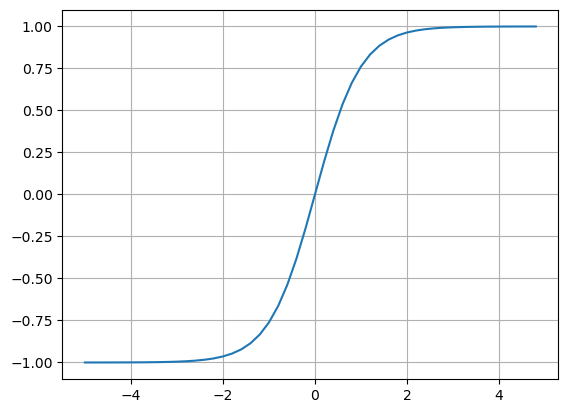

In [46]:
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)));plt.grid();

- In tanh, the inputs get squashed between -1 and 1. Inputs that are negative are closer to negative one and those that are more positive are closer to positive one. zero is at zero.

#### sigmoid(just for comparison)

In [49]:
def sig(x):
    return 1/(1 + np.exp(-x)) 


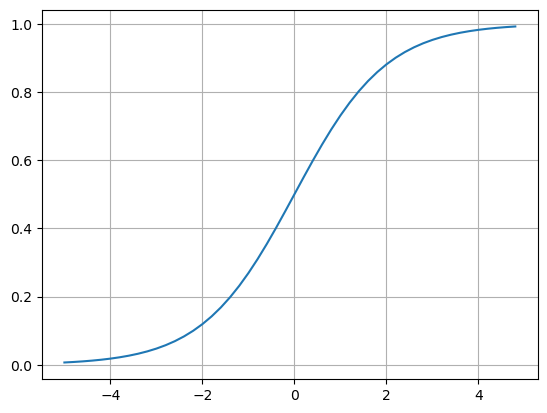

In [50]:
plt.plot(np.arange(-5,5,0.2),sig(np.arange(-5,5,0.2)));plt.grid();

-this is between 0 and 1. If a number is more negative it is closer to 0 and if more positive closer to 1. O is at 0.5.

## A neuron with two inputs(2 dimensional neuron)

In [ ]:
#inputs x1,x2 

x1=Value(2.0, label='x1')
x2